In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_30279_U')

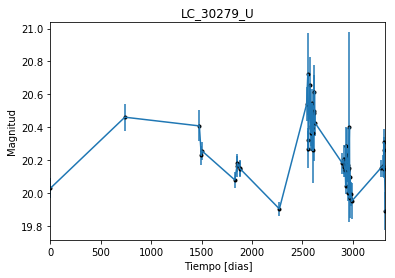

In [2]:
data = np.genfromtxt('LC_30279_U.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_30279_U')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

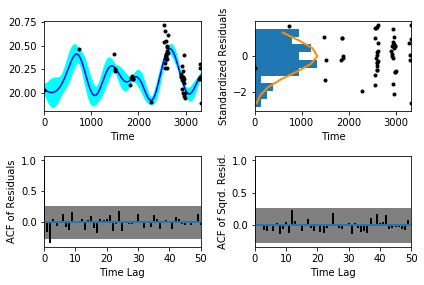

In [5]:
sample.assess_fit()

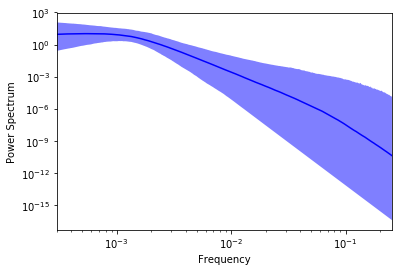

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_30279_U')

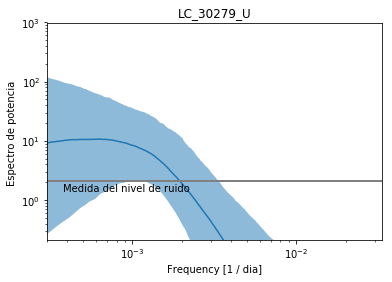

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_30279_U')

Text(0.5,1,'Prediccion , valor esperado LC_30279_U')

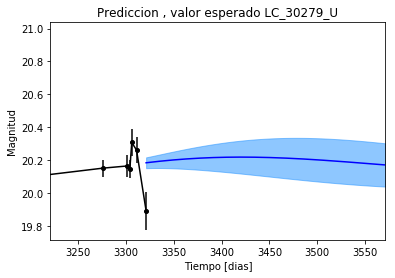

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_30279_U')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_30279_U')

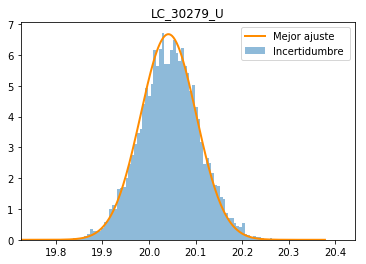

In [10]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_30279_U')

Text(0.5,1,'Interpolacion, camino simulado LC_30279_U')

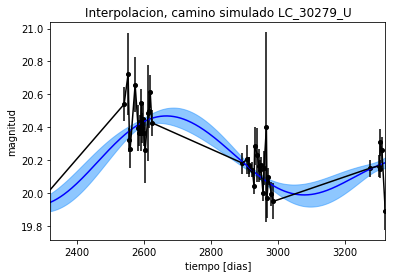

In [11]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_30279_U')

Text(0.5,1,'Interpolacion, camino simulado LC_30279_U')

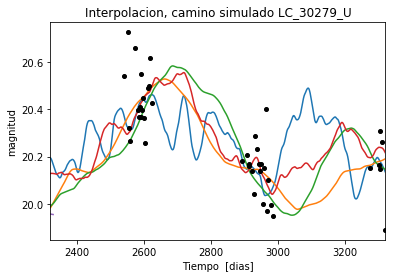

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_30279_U')

In [13]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [14]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 359.014912528
Median: 0.00231263351188
Standard deviation: 0.0722534402997
68% credibility interval: [ 0.00051134  0.04120382]
95% credibility interval: [ 0.0003252   0.28518187]
99% credibility interval: [  3.06016994e-04   4.36277513e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 760.710390369
Median: 0.00127972486631
Standard deviation: 0.0382572472182
68% credibility interval: [ 0.00045828  0.00987232]
95% credibility interval: [ 0.00032275  0.1043259 ]
99% credibility interval: [ 0.00030463  0.2855118 ]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 898.821279592
Median: 0.00194965510151
Standard deviation: 0.1131

In [15]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 727.379723097
Median: 61.4131055867
Standard deviation: 1.96565093013
68% credibility interval: [ 59.43260733  63.11936602]
95% credibility interval: [ 56.54243095  64.29787454]
99% credibility interval: [ 54.18530035  64.92479346]


In [16]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 1040.73743354
Median: 0.153155494143
Standard deviation: 0.952811935944
68% credibility interval: [ 0.02302976  1.49656699]
95% credibility interval: [ 0.01082993  3.15583289]
99% credibility interval: [ 0.00859691  4.57312698]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 1004.14664609
Median: 0.044261724984
Standard deviation: 1.91995074989
68% credibility interval: [  9.08125584e-04   1.36403922e+00]
95% credibility interval: [  1.

In [17]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 1117.69878769
Median: 2.70835267832e-17
Standard deviation: 2.70053637152e+56
68% credibility interval: [  4.28958786e-66   2.13480303e+26]
95% credibility interval: [  6.38947874e-94   7.46621557e+48]
99% credibility interval: [  1.81287010e-100   7.22549986e+054]


In [18]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2057.05033084
Median: 20.1835955291
Standard deviation: 0.0938879665136
68% credibility interval: [ 20.12276658  20.25139915]
95% credibility interval: [ 20.01963885  20.3764184 ]
99% credibility interval: [ 19.88191941  20.53999985]


In [19]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 584.557640856
Median: 0.00193723723526
Standard deviation: 0.113082585462
68% credibility interval: [ 0.          0.14502338]
95% credibility interval: [ 0.          0.41410514]
99% credibility interval: [ 0.         0.4920124]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 584.557640856
Median: 0.00193723723526
Standard deviation: 0.113082585462
68% credibility interval: [ 0.          0.14502338]
95% credibility interval: [ 0.          0.41410514]
99% credibility interval: [ 0.         0.4920124]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 781.076187117
Median: 0.0
Standard deviation: 0.000634276183722
68% cred

In [20]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 727.379723097
Median: 61.4131055867
Standard deviation: 1.96565093013
68% credibility interval: [ 59.43260733  63.11936602]
95% credibility interval: [ 56.54243095  64.29787454]
99% credibility interval: [ 54.18530035  64.92479346]


In [21]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 736.159626774
Median: 0.0376400137764
Standard deviation: 0.0670845196113
68% credibility interval: [ 0.02076098  0.07937239]
95% credibility interval: [ 0.01233582  0.19845393]
99% credibility interval: [ 0.00931564  0.43045454]


In [22]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1919.05964295
Median: 1.05021008072
Standard deviation: 0.157642099089
68% credibility interval: [ 0.90815676  1.21686654]
95% credibility interval: [ 0.79257518  1.40789704]
99% credibility interval: [ 0.73404269  1.5694245 ]


In [23]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 1743.26992104
Median: 4.56567293395e-06
Standard deviation: 0.0071073562658
68% credibility interval: [  5.52967894e-32   3.26778113e-04]
95% credibility interval: [  4.57279942e-54   3.77760993e-03]
99% credibility interval: [  6.44032742e-60   2.91459374e-02]


In [24]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 359.014912528
Median: (-0.0145307049027+0j)
Standard deviation: 0.843170477811
68% credibility interval: [-0.25889126+0.j         -0.00321283-0.01153869j]
95% credibility interval: [-1.79185055-3.15453962j -0.00204332-0.00798633j]
99% credibility interval: [ -2.74121246e+00+0.j          -1.92276148e-03-0.00452854j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 760.710390369
Median: (-0.00804074847723+0.0130429867952j)
Standard deviation: 0.750078864515
68% credibility interval: [-0.06202961+0.75680835j -0.00287946+0.00905936j]
95% credibility interval: [-0.65549898+0.33839751j -0.00202792+0.00738109j]
99% credibility interval: [-1.79392353+2.14354434j -0.00191402+0.5899013j ]
Posterior summary for parameter ar_roots 